C:\Users\Wilcoxon\AppData\Local\Temp\ipykernel_22916\153790671.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_M = df.set_index("TradingDay")["ClosePrice"].resample(period).last()


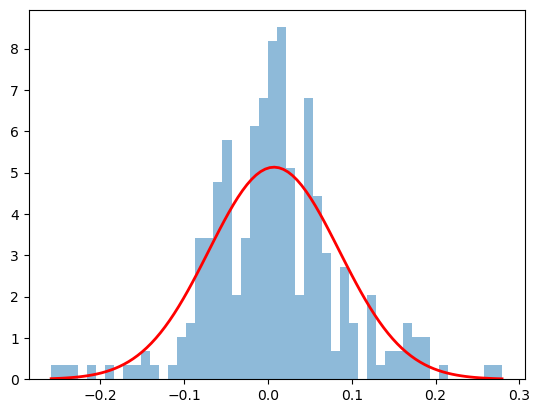

0.12364847324612899 1.5337620468661113


In [10]:
from quant_utils.db_conn import DB_CONN_JJTG_DATA
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis
import numpy as np
period = "M"
bins = 50
query_sql = """
SELECT * FROM `chentiancheng`.`jy_indexquote` WHERE `SecuCode` = '000300' 
"""
df = DB_CONN_JJTG_DATA.exec_query(query_sql)
df["TradingDay"] = pd.to_datetime(df["TradingDay"])
df_M = df.set_index("TradingDay")["ClosePrice"].resample(period).last()
df_M = df_M.reset_index()
df_M["ret"] = df_M.ClosePrice.pct_change()
data = df_M["ret"].dropna()
%matplotlib inline
plt.hist(data, bins=bins, density=True, alpha=0.5)


# 计算正态分布的PDF

x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, norm.pdf(x, data.mean(), data.std()), 'r-', lw=2)
plt.show()
print(skew(data),kurtosis(data)) 

In [2]:
df = df.set_index("TradingDay")

In [5]:
for i in [60,120,250,500,750]:
    df[f"ret_{i}"] = (df["ClosePrice"]/df["ClosePrice"].shift(i) - 1)*100
    df[f"ret_{i}"] = df[f"ret_{i}"].shift(1)

df[df['ChangePCT'] >= 4][["ret_60", "ret_120", "ret_250", "ret_500", "ret_750"]].describe()

,ret_60,ret_120,ret_250,ret_500,ret_750
count,68.000000,66.000000,65.000000,65.000000,63.000000
mean,-4.994186,0.301532,28.924948,89.941896,109.735419
std,23.109622,41.821501,81.697548,135.374708,112.975590
min,-41.383801,-57.798818,-70.505154,-44.327400,-38.147823
25%,-20.762743,-31.196403,-26.874082,-3.264953,17.441140
50%,-8.738837,-8.982280,8.976746,36.248116,96.598469
75%,11.157524,25.131503,66.235215,112.488319,187.318779
max,53.681648,128.413796,269.421488,446.126442,364.700546


In [7]:
df[df['ChangePCT'] >= 4][["ret_60", "ret_120", "ret_250", "ret_500", "ret_750"]]

,ret_60,ret_120,ret_250,ret_500,ret_750
TradingDay,,,,,
2002-01-23,NaN,NaN,NaN,NaN,NaN
2002-01-31,NaN,NaN,NaN,NaN,NaN
2002-06-06,-7.126503,NaN,NaN,NaN,NaN
2002-06-24,-5.940502,NaN,NaN,NaN,NaN
2003-01-14,-8.862838,-19.541924,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-24,-6.987417,-8.279771,-14.097054,-23.298864,-37.115529
2024-09-26,-2.203728,-3.843163,-9.548246,-16.362096,-33.973274
2024-09-27,2.118066,-1.399643,-5.120384,-13.561168,-30.336777


In [6]:
data.describe()

count    8326.000000
mean        0.000215
std         0.012922
min        -0.092398
25%        -0.002904
50%         0.000000
75%         0.003357
max         0.093893
Name: ret, dtype: float64

In [9]:
data[data < data.quantile(0.1)].mean()

-0.023915052899553587

C:\Users\Wilcoxon\AppData\Local\Temp\ipykernel_22916\1861428416.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_M = df.set_index("TRADE_DT")["S_DQ_CLOSE"].resample(period).last()


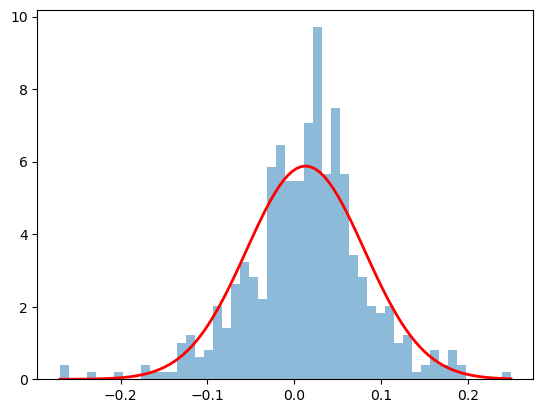

-0.3630566948615946 1.6810374556071652


In [9]:
query_sql = """
SELECT * FROM `chentiancheng`.`global_index_eod_jy` WHERE `TICKER_SYMBOL` = 'NDX' 
"""
df = DB_CONN_JJTG_DATA.exec_query(query_sql)
df["TRADE_DT"] = pd.to_datetime(df["TRADE_DT"])
df_M = df.set_index("TRADE_DT")["S_DQ_CLOSE"].resample(period).last()
df_M = df_M.reset_index()
df_M["ret"] = df_M["S_DQ_CLOSE"].pct_change()
data = df_M["ret"].dropna()
%matplotlib inline
plt.hist(data, bins=50, density=True, alpha=0.5)
# 计算正态分布的PDF
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, norm.pdf(x, data.mean(), data.std()), 'r-', lw=2)
plt.show()
print(skew(data),kurtosis(data)) 

In [11]:
data[data < data.quantile(0.1)].mean()

-0.025072567254674244

In [12]:
data.describe()

count    14500.000000
mean         0.000442
std          0.013538
min         -0.150753
25%         -0.002509
50%          0.000000
75%          0.004676
max          0.187713
Name: ret, dtype: float64